In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split #split data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # to determine how intelligent our model is
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    HistGradientBoostingRegressor,
    RandomForestRegressor
)
import joblib # save the model without training again

housing = datasets.fetch_california_housing()

x = housing.data
y = housing.target

#print(x.shape)

poly = PolynomialFeatures()
x = poly.fit_transform(x) # expanding features

#print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.2, 
    random_state=432 # keep shuffling consistent
)

#LR = LinearRegression()
#GBR = HistGradientBoostingRegressor()
#RFR = RandomForestRegressor(
#    n_jobs =-1
#)


model = HistGradientBoostingRegressor(
    max_iter=350,
    learning_rate=0.05
)
model.fit(x_train, y_train)

joblib.dump(model, "my_model.joblib")
y_pred = model.predict(x_test) # Prediction of the target
r2 = r2_score(y_test, y_pred) # comparing the actual value of the test set with the predicted value
print( r2)
    
#print(housing.feature_names)
#print(x_train[0])
#print(y_train[0])
#print(r2)


0.8432058915406407


In [2]:
# To run the saved model 
local_model = joblib.load("my_model.joblib")
y_pred = local_model.predict(x_test)
r2 = r2_score(y_test, y_pred) 
print( r2)

#same r2 which means the models are perfect copies 

0.8432058915406407


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

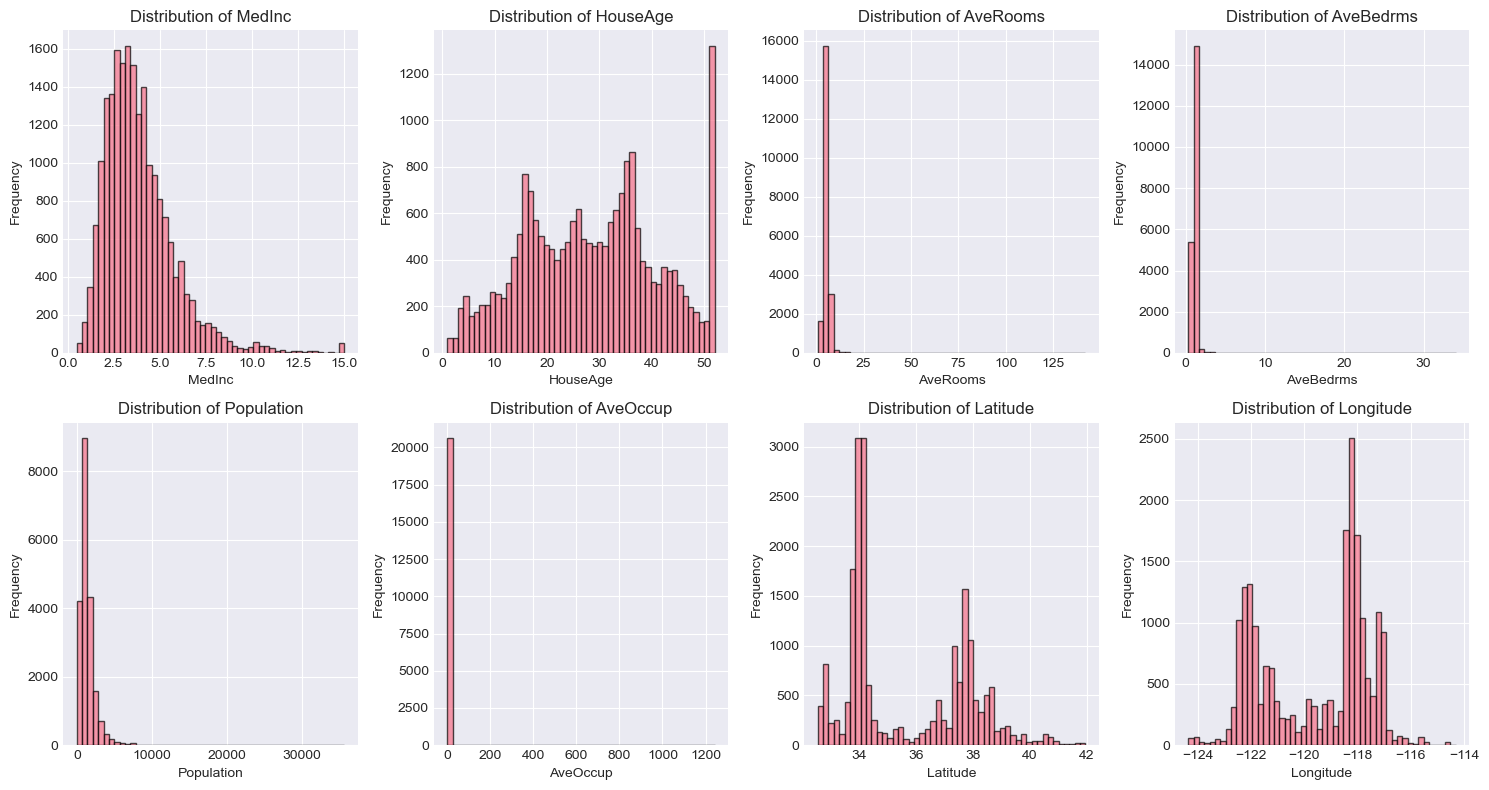

In [34]:
#Feature Distribution Histograms
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(housing.feature_names):
    axes[idx].hist(housing.data[:, idx], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('feature_dist_hist.png', dpi=300, bbox_inches='tight')
plt.show()


## Correlation Heatmap - Shows feature relationships

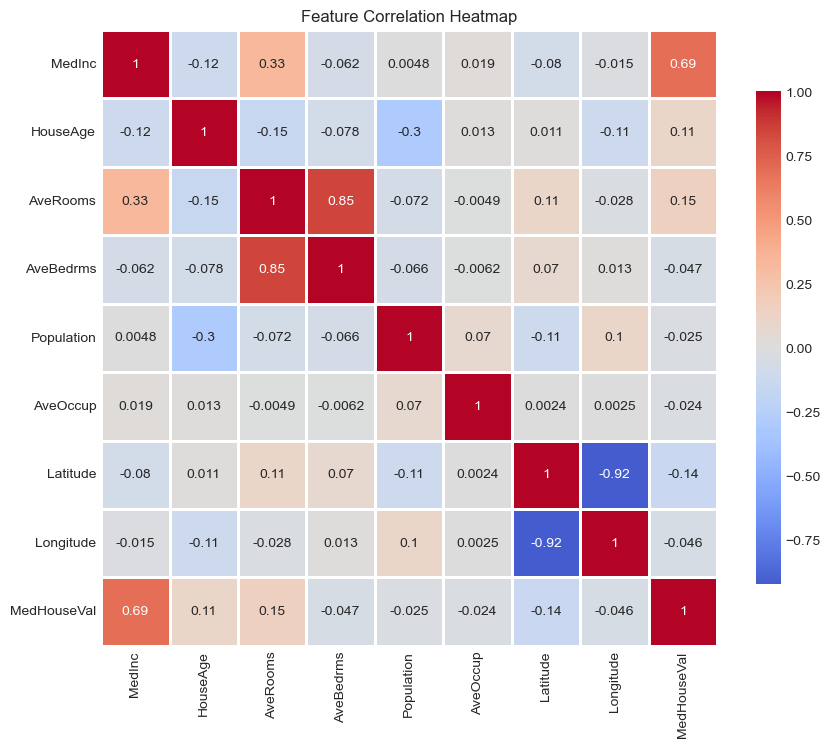

In [35]:
# DataFrame for easier plotting
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


## Actual vs Predicted Values (Scatter Plot) - Shows model performance visually

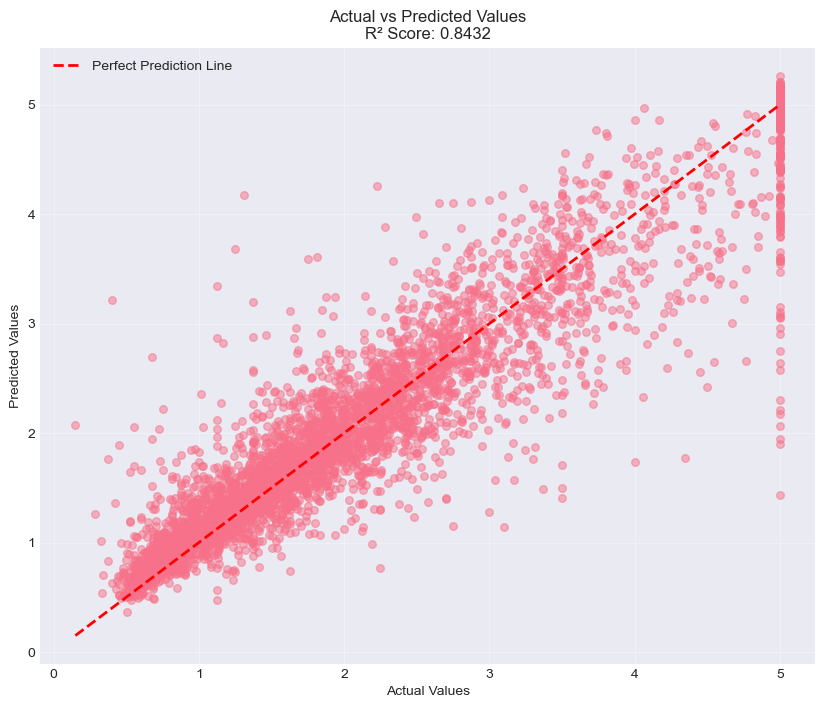

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values\nR² Score: {r2:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Residual Plot - Shows prediction errors

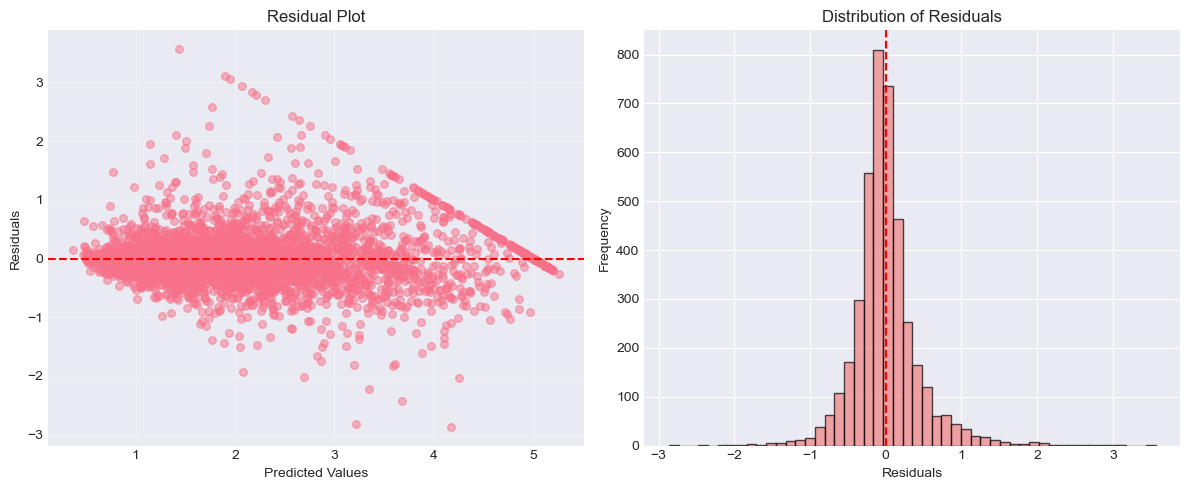

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5, s=30)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## Model Comparison Bar Chart - Shows why I chose Gradient Boosting

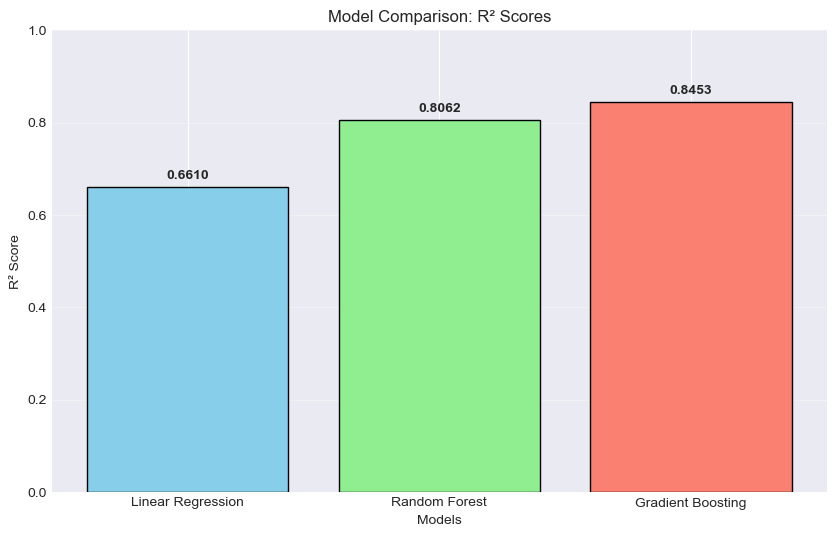

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': HistGradientBoostingRegressor(max_iter=350, learning_rate=0.05)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = r2_score(y_test,y_pred)

# Visualization
plt.figure(figsize=(10,6))
colors = ['skyblue', 'lightgreen', 'salmon']
bars = plt.bar(results.keys(), results.values(), color=colors, edgecolor='black')

# Value labels on bars
for bar, (name, score) in zip(bars, results.items()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Scores')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.show()